In [1]:
import gpxpy
import random
from datetime import timedelta

In [2]:
def read_gpx(file_path):
    gpx = gpxpy.parse(open(file_path, 'r'))
    data = []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                data.append({
                    'latitude': point.latitude,
                    'longitude': point.longitude,
                    'elevation': point.elevation,
                    'time': point.time
                })
    return data

def randomize_user_behavior(gpx_data):
    # Randomize geo data based on gpx file.
    randomized_data = []
    for point in gpx_data:
        speed_factor = random.uniform(0.8, 1.2)
        # Randomize lat, lon
        lat_variation = random.uniform(-0.0002, 0.0002)
        lon_variation = random.uniform(-0.0002, 0.0002)
        # Randomize elevation.
        randomized_elevation = point['elevation'] * speed_factor
        # Randomize time span max 40 minutes.
        time_variation = timedelta(minutes=random.uniform(0, 5))
        # 5% chance for reverse direction
        if random.random() < 0.05:  # 
            lat_variation *= -1
            lon_variation *= -1

        # Generate randomized data point
        randomized_point = {
            'latitude': point['latitude'] + lat_variation,
            'longitude': point['longitude'] + lon_variation,
            'elevation': randomized_elevation,
            'time': point['time'] + time_variation
        }
        randomized_data.append(randomized_point)
    return randomized_data

In [4]:
gpx_file_path = 'user_data/user_1_profile.gpx'
gpx_data = read_gpx(gpx_file_path)
randomized_data = randomize_user_behavior(gpx_data)

In [5]:
randomized_data

[{'latitude': 59.30715440597377,
  'longitude': 18.040048098629107,
  'elevation': 0.0,
  'time': datetime.datetime(2024, 3, 1, 8, 1, 15, 489597)},
 {'latitude': 59.2886518098783,
  'longitude': 18.02818647242193,
  'elevation': 0.0,
  'time': datetime.datetime(2024, 3, 1, 16, 4, 21, 722389)},
 {'latitude': 59.329100294439286,
  'longitude': 18.068664974942582,
  'elevation': 0.0,
  'time': datetime.datetime(2024, 3, 2, 0, 4, 4, 712355)},
 {'latitude': 59.332945054284345,
  'longitude': 18.115850743673022,
  'elevation': 0.0,
  'time': datetime.datetime(2024, 3, 2, 1, 4, 0, 261626)},
 {'latitude': 59.33447623006351,
  'longitude': 18.101496713895873,
  'elevation': 0.0,
  'time': datetime.datetime(2024, 3, 2, 3, 1, 31, 726289)},
 {'latitude': 59.349810600728546,
  'longitude': 18.023084591279506,
  'elevation': 0.0,
  'time': datetime.datetime(2024, 3, 2, 5, 0, 47, 657167)},
 {'latitude': 59.37776290574506,
  'longitude': 18.10431855762873,
  'elevation': 0.0,
  'time': datetime.dateti

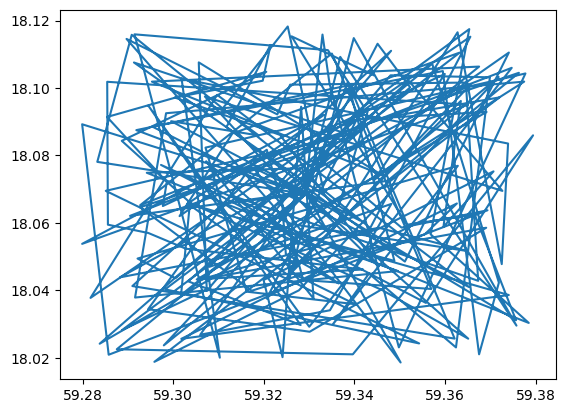

In [6]:
import matplotlib.pyplot as plt
plt.plot([point['latitude'] for point in randomized_data], [point['longitude'] for point in randomized_data])
